# distance

- distance metric determines how far away is each point from a point.

## inner product → norm → distance

an inner product is a function $\left<x, y\right>$ that:

- symmetric: $\left<x, y\right> = \left<y, x\right>$

- non-negative: $\left<x, y\right>\geq 0, \left<0, 0\right>=0$

- linear: $\left<\alpha x, y\right>=\alpha\left<x, y\right>, \left<x+y, z\right> =\left<x, z\right> + \left<y, z\right>$

- similarity of 2 vectors can be defined based on inner product between 2 vectors

- covariance matrix is a dot product between centered feature vectors, where n is sample size

$$
cov(X)=\frac{X^TX}{n-1}
$$

- cosine similarity is a measure of similarity between two vectors $a, b$ defined in an inner product space.

$$
\text{cosine similarity} = cos(\theta)=\frac{a^Tb}{\left \| a \right \| \left \| b \right \|}
$$

## inner product → norm → distance

- -> means induce 归纳出

- most common inner product is Euclidean dot product, which induces Euclidean distance

    - Euclidean dot product: 
    
    $$
    \left<x, y\right>= x^Ty = \sum_{i=1}^d x_i y_i
    $$
    
    - Euclidean distance (induced by $l_2$ norm, which is square root of inner product)
    
    $$
    d_2(x,y) = \left \| x-y \right \|_2 = \sqrt{\left<x-y, x-y\right>} :=\sqrt{\sum_{i=1}^d \left ( x_i - y_i \right )^2}
    $$
    
    notation := means definition

- Manhattan Distance (induced by $l_1$ norm): named from blocks of Manhattan

    $$
    d_1(x,y) = | x-y | :=\sum_{i=1}^d | x_i - y_i |
    $$

- a **distance** (a metric) is a function $f(x,y)$ that is **symmetric, non-negative and follows triangle inequality**

    - symmetric: $f(x,y)=f(y,x)$
    
    - non-negative: $f(x,y)\geq0, f(x,x)=0$
    
    - triangle inequality: $f(x,y)\leq f(x,z)+f(y,z)$

- properties of a **distance matrix:** 

    - diagonal entries are all 0s
    
    - symmetric
    
    - non-negative, all the entries $D_{i,j}=d(x_i, x_j)\geq 0$, where $d$ is distance function

- once we have distance matrix, we can define MDS

# MDS (MultiDimensional Scaling)

## intro

- MDS is a dim reduction method designed to **preserve distance in some metric**

- use MDS to produce interesting embeddings that show underlying structure of data

- e.g., PCA is MDS on Euclidean distance, PHATE is MDS on Manifold distances

## movitation: distance/proximities preservation

- MDS preserve **distance/proximities** while PCA preserves **variance**

- motivation 1: preserve distances/structure between data points from high dim to **lower dim**
    
- motivation 2: find coordinates for data points that doesn't come with coordinates, so that they can have pairwise distances

    e.g., Social network, protein/gene interaction
    
    data is a set of proximities/dissimilarities between subjects

## optimization

- objective: find new coordinates of data that minimize **stress**

    stress: distance between given distance and Euclidean distances between new coordinates

$$
\hat Y =\arg \min_{Y} Stress (Y)=\arg \min_{Y} \sum _{i=1}^n \sum _{i=1}^n \sqrt{\left ( D_{i,j}-\left \| y_i - y_j \right \| ^2\right )}
$$

where $D \in \mathbb{R}^{n \times n}$ is a given distance matrix calculated from original data points using **some distance metric**,

$Y = \left \{ y_1, y_2,...,y_n \right \}$ is a set of new coordinates for data points 

$\left \| y_i - y_j \right \| ^2$ is **Euclidean distance** between 2 data points $y_i, y_j$

- solution: **NO analytic solution** (closed-form)

    - iterative steepest descent
    
    - stress majorization

## special case: classic MDS = PCA

- Classic MDS has analytic solution: new coordinates $Y=US$
    
    where $U, S$ are matrices from SVD of inner product of mean centered data

$$
B=X_c^T X_c= USV^T
$$


- if given distance matrix using **Euclidean distance**, then MDS is PCA, we don't need to use iterative steepest descent algo


### double centering

- Euclidean dot product matrix of data $X^TX$ can be derived from distance matrix D by double centering

- apply **law of Cosine** to distance matrix D 余弦定理

$$
D_{i,j}^2 = \left \| x_i-x_j \right \|_2^2 =  \left \| x_i-\bar x \right \|_2^2 + \left \| x_j-\bar x \right \|_2^2 -2\left \langle x_i-\bar x,  x_j- \bar x \right \rangle
$$

the last term is i, j th entry of mean centered data inner product matrix $X_c^TX_c$,

we can directly modify $D^2$ to remove first 2 terms

- define matrix $B$

$$
B=\left (I_n -\frac{1}{n} J_n \right )D^2 \left (I_n -\frac{1}{n} J_n \right )=X_c^TX_c
$$

$I_n -\frac{1}{n} J_n \in \mathbb{R}^{n \times n}$ is a centering matrix,

$I_n \in \mathbb{R}^{n \times n}$ is an Identity matrix with all 0 entries except diagonal entries all 1s

$J_n \in \mathbb{R}^{n \times n}$ is a matrix of all 1 entries


- then we can reformulate Stress to Strain

$$
\hat Y =\arg \min_{Y} Stress (Y)=\arg \min_{Y} \sum _{i=1}^n \sum _{i=1}^n \sqrt{\left ( D_{i,j}-\left \| y_i - y_j \right \| ^2\right )}
$$

$$
\hat Y =\arg \min_{Y} Strain (Y)=\arg \min_{Y} \sum _{i=1}^n \sum _{i=1}^n \sqrt{\frac{(B_{i,j} - y_i ^T y_j)^2}{B_{i,j}^2}}
$$

where $B_{i,j}$ is i,j th entry of inner product of **mean centered** data matrix $X_c^TX_c$

- SVD of B: **solution**  new coordinates $Y=US$

$$
B= USV^T
$$

- eigendecomposition of B

$$
B=U\Lambda U^{-1}= U\Lambda U^T = U \Lambda ^{1/2} \Lambda ^{1/2} U^T=(\Lambda ^{1/2} U^T)^T(\Lambda ^{1/2} U^T)
$$

so mean centered data $X_c$ is 

$$X_c=\Lambda ^{1/2} U^T$$

# Wine dataset

SKlearn MDS tutorial: https://scikit-learn.org/stable/auto_examples/manifold/plot_mds.html

create different embedding using MDS of different distances

- classic MDS (cMDS): Euclidean distance

- mMDS: Manhattan distance.

- nMDS: non-metric MDS

### load Wine dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.preprocessing
import sklearn.datasets
from sklearn import manifold 
from scipy.spatial.distance import pdist, squareform, cityblock

In [3]:
wine = sklearn.datasets.load_wine()

# Access the numerical data from the wine Bunch
data = wine['data']

# features: Load features of data
feature_names = wine['feature_names']

# label: Load cultivar information about each wine
cultivars = np.array(['Cultivar{}'.format(cl) for cl in wine['target']])

# Create nice names for each row
wine_names = np.array(['Wine{}'.format(i) for i in range(data.shape[0])])

# use the sklearn StandardScaler to scale to mean 0, variance 1
data = sklearn.preprocessing.StandardScaler().fit_transform(data)

# Gather all of this information into a DataFrame
data = pd.DataFrame(data, columns=feature_names, index=wine_names)

# Print the first 5 rows of the data, eq. to data[:5]
data.head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Wine0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
Wine1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
Wine2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
Wine3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
Wine4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


/opt/anaconda3/envs/d2l/lib/python3.8/site-packages/sklearn/manifold/_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/opt/anaconda3/envs/d2l/lib/python3.8/site-packages/sklearn/manifold/_mds.py:259: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 4
  warnings.warn(


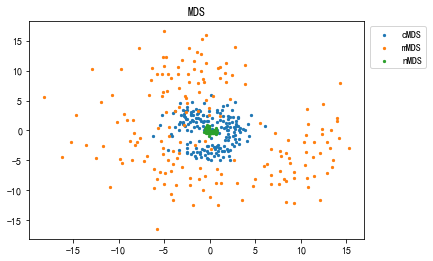

In [4]:
# Pairwise distances between observations, default metric='euclidean'
metrics = ['euclidean', 'cityblock']
labels = ['cMDS', 'mMDS']

model = manifold.MDS(n_components=2, dissimilarity="precomputed")
for metric, label in zip(metrics, labels):

    similarities = squareform(pdist(data, metric)) # a square distance matrix (178, 178)
    embedding = model.fit_transform(similarities) #(178, 2)
    plt.scatter(embedding[:, 0], embedding[:, 1], s=5, label=label)

model = manifold.MDS(n_components=2, metric=False)
embedding = model.fit_transform(similarities, init=embedding)
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, label='nMDS')

plt.legend(bbox_to_anchor=(1.2, 1))
plt.title("MDS")
plt.show()